<a href="https://colab.research.google.com/github/Zendellll/Road2_AI_Course/blob/main/AICourse_task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!rm -rf /content/all_images

In [2]:
import tensorflow as tf

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dots_filtered.zip', origin=_URL, extract=True)

!unzip ~/.keras/datasets/cats_and_dots_filtered.zip -d /content/

Archive:  /root/.keras/datasets/cats_and_dots_filtered.zip
   creating: /content/cats_and_dogs_filtered/
  inflating: /content/cats_and_dogs_filtered/vectorize.py  
   creating: /content/cats_and_dogs_filtered/validation/
   creating: /content/cats_and_dogs_filtered/train/
   creating: /content/cats_and_dogs_filtered/validation/dogs/
  inflating: /content/cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: /content/cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: /content/cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: /content/cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: /content/cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: /content/cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: /content/cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: /content/cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: /content/cats_and_dogs_filtered/validation/

In [33]:
import os
print(len(os.listdir('/content/cats_and_dogs_filtered/train/cats')), len(os.listdir('/content/cats_and_dogs_filtered/train/dogs')))
print(len(os.listdir('/content/cats_and_dogs_filtered/validation/cats')), len(os.listdir('/content/cats_and_dogs_filtered/validation/dogs')))

1000 1000
500 500


In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

# Set image dimensions
img_height, img_width = 150, 150

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Define the batch size
batch_size = 32

# Create generators for training, validation, and testing sets
train_generator = train_datagen.flow_from_directory(
    directory='/content/cats_and_dogs_filtered/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    directory='/content/cats_and_dogs_filtered/validation',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the sequential model
model = Sequential()

# Input layer
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Additional Conv2D and MaxPooling2D layers
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer
model.add(Flatten())

# Dense layer
model.add(Dense(512, activation='relu'))

# Output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 75, 75, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 73, 73, 32)        4640      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 36, 36, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 17, 17, 64)       

Epoch 1/10
62/62 [==============================] - 7s 95ms/step - loss: 0.6862 - accuracy: 0.5554 - val_loss: 0.6883 - val_accuracy: 0.5423
Epoch 2/10
62/62 [==============================] - 5s 76ms/step - loss: 0.6594 - accuracy: 0.5965 - val_loss: 0.6322 - val_accuracy: 0.6179
Epoch 3/10
62/62 [==============================] - 5s 84ms/step - loss: 0.5956 - accuracy: 0.6717 - val_loss: 0.6407 - val_accuracy: 0.6220
Epoch 4/10
62/62 [==============================] - 5s 76ms/step - loss: 0.5746 - accuracy: 0.6845 - val_loss: 0.5813 - val_accuracy: 0.7117
Epoch 5/10
62/62 [==============================] - 7s 110ms/step - loss: 0.5210 - accuracy: 0.7307 - val_loss: 0.5614 - val_accuracy: 0.7419
Epoch 6/10
62/62 [==============================] - 5s 81ms/step - loss: 0.4733 - accuracy: 0.7713 - val_loss: 0.5500 - val_accuracy: 0.7379
Epoch 7/10
62/62 [==============================] - 6s 104ms/step - loss: 0.4270 - accuracy: 0.8095 - val_loss: 0.5343 - val_accuracy: 0.7379
Epoch 8/10


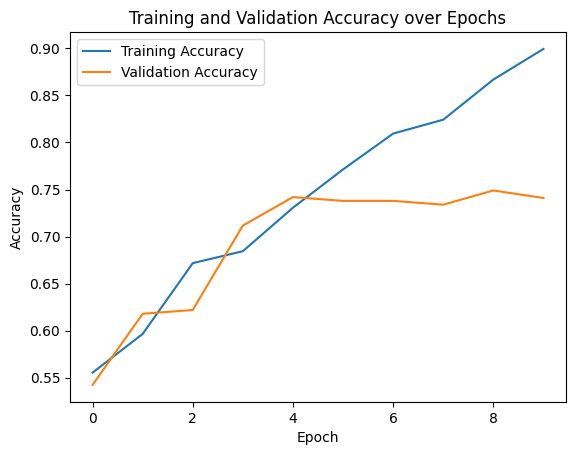

63/63 [==============================] - 3s 48ms/step


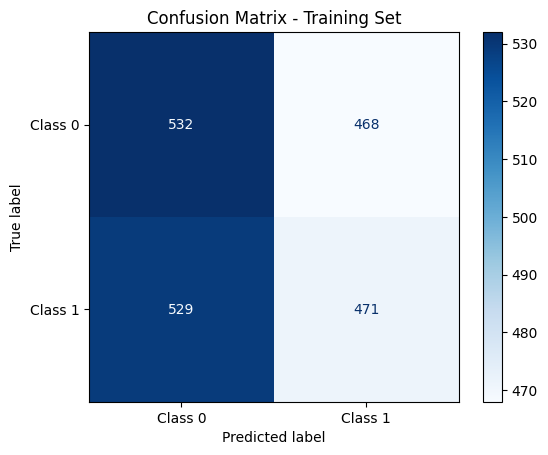

32/32 [==============================] - 1s 45ms/step


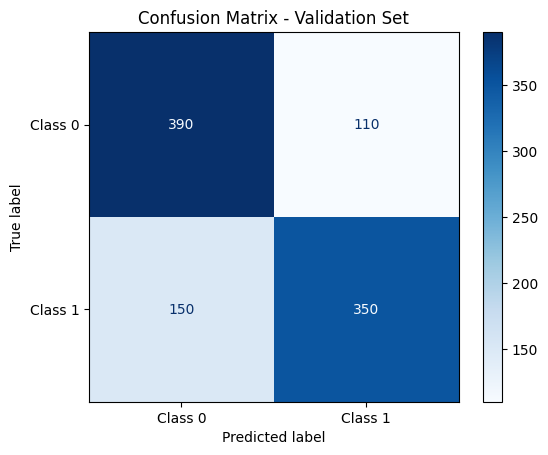

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ... (Previous code remains unchanged)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

# Plot accuracy during training
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy over Epochs')
plt.show()

# Get predictions on the training set
train_predictions = model.predict(train_generator, steps=train_generator.samples // batch_size)
train_pred_labels = np.argmax(train_predictions, axis=1)
train_true_labels = train_generator.classes

# Calculate the total number of samples in the training set
num_train_samples = len(train_generator.filenames)

# Get predictions on the training set
train_predictions = model.predict(train_generator, steps=num_train_samples // batch_size + 1)[:num_train_samples]
train_pred_labels = np.argmax(train_predictions, axis=1)
train_true_labels = train_generator.classes[:num_train_samples]

# Confusion matrix for training set
cm_train = confusion_matrix(train_true_labels, train_pred_labels, labels=[0, 1])

# Display confusion matrix for training set
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Class 0', 'Class 1'])
disp_train.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Training Set')
plt.show()

# Get predictions on the validation set
val_predictions = model.predict(val_generator, steps=val_generator.samples // batch_size)
val_pred_labels = np.argmax(val_predictions, axis=1)
val_true_labels = val_generator.classes

# Calculate the total number of samples in the validation set
num_val_samples = len(val_generator.filenames)

# Get predictions on the validation set
val_predictions = model.predict(val_generator, steps=num_val_samples // batch_size + 1)[:num_val_samples]
val_pred_labels = np.argmax(val_predictions, axis=1)
val_true_labels = val_generator.classes[:num_val_samples]

# Confusion matrix for validation set
cm_val = confusion_matrix(val_true_labels, val_pred_labels, labels=[0, 1])


# Display confusion matrix for validation set
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=['Class 0', 'Class 1'])
disp_val.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Validation Set')
plt.show()
